# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

4

### Compléter le code et commenter

In [4]:
A=0 #position du pion
NA=0 #nbr de coup
S=10 #long du chemin
c=0

temp=0
while temp<6:
        temp=Roll()
        NA =NA+1
        if temp==6:
            A=1 
        print("temp="+str(temp)+"    A="+str(A)+"    NA="+str(NA))
print("free to go")
while (A<S) :
    temp =Roll()
    NA = NA+1
    
    if A+temp==S:
        A = S
        print("temp="+str(temp)+"    A="+str(A)+"    NA="+str(NA))
        break
    elif A+temp<S:
        A = A+temp
        print("temp="+str(temp)+"    A="+str(A)+"    NA="+str(NA))
    else:
        print("temp="+str(temp)+"    A="+str(A)+"    NA="+str(NA))


temp=3    A=0    NA=1
temp=5    A=0    NA=2
temp=5    A=0    NA=3
temp=5    A=0    NA=4
temp=2    A=0    NA=5
temp=4    A=0    NA=6
temp=2    A=0    NA=7
temp=6    A=1    NA=8
free to go
temp=4    A=5    NA=9
temp=3    A=8    NA=10
temp=3    A=8    NA=11
temp=6    A=8    NA=12
temp=3    A=8    NA=13
temp=2    A=10    NA=14


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    A=0
    NA=0
    c=0
    while (A<S) :
        A = A+Roll()
        c=c+1
    return c
    

In [6]:
sim(20)

7

### Simulation de $10^5$  scénario 

In [7]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [8]:
ESP=Freq.sum()/10**4

In [9]:
x=list(range(10,20))

In [10]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/1000 for u in x]

In [11]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


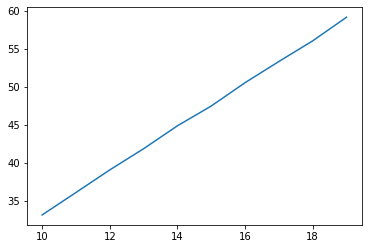

In [12]:
plt.plot(x,y)

In [13]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [14]:
slope

2.868224242424242

In [15]:
intercept


4.611448484848488

In [16]:
yy=[slope*u+intercept for u in x]

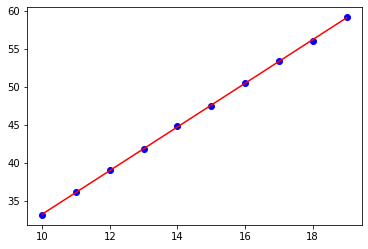

In [17]:
plt.plot(x,y,'ob',x,yy,'r')

<h1>le code </h1>
<p>apres avoir un nombre 6 retourner par la fn Roll pour rentrer au chemin. 
il nous permet de relancer un dé jusqu'a ce qu'il arrive au fin du chemin
et repete cette experience un nombre fini de fois.<p>
<p>a chaque fois on lance le dé il augmente le nombre de lancement.</p>

